# ***Importing Keras libraries***

In [1]:
import keras

# ***Importing ImageDataGenerator from Keras***

In [2]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# ***Defining the Parameters***

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

# ***Mounting Dataset from drive***

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Applying ImageDataGenerator functionality to train dataset***

In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


# ***Applying ImageDataGenerator functionality to test dataset***

In [6]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


# ***Importing Model Building Libraries***

In [7]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

# ***Initializing the model***

In [8]:
model = Sequential()

# ***Adding CNN Layers***

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

# ***Add Dense layers***

In [10]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

# ***configuring the learning process***

In [11]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

# ***Training the model***

In [12]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 199s 14s/step - loss: 0.9853 - accuracy: 0.7041 - val_loss: 0.2081 - val_accuracy: 0.9008
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.2632 - accuracy: 0.8922 - val_loss: 0.1141 - val_accuracy: 0.9669
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.2156 - accuracy: 0.9128 - val_loss: 0.1189 - val_accuracy: 0.9504
Epoch 4/10
14/14 [==============================] - 20s 1s/step - loss: 0.2084 - accuracy: 0.8922 - val_loss: 0.1001 - val_accuracy: 0.9587
Epoch 5/10
14/14 [==============================] - 22s 2s/step - loss: 0.1872 - accuracy: 0.9151 - val_loss: 0.1528 - val_accuracy: 0.9008
Epoch 6/10
14/14 [==============================] - 20s 2s/step - loss: 0.1876 - accuracy: 0.9106 - val_loss: 0.0922 - val_accuracy: 0.9669
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 0.1669 - accuracy: 0.9404 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 8/10
14/14 [

# ***Save the model***

In [13]:
model.save("forest.h5")

# ***Predictions***

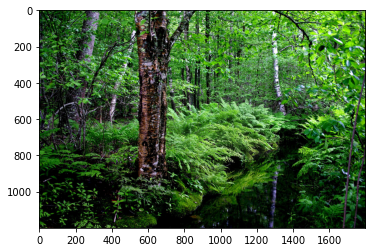

In [14]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img('/content/drive/MyDrive/Dataset/test_set/forest/forest (40).jpg')
x=image.img_to_array(img)
plt.imshow(img)
plt.show()
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [15]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 103ms/step


0

In [16]:
if pred==1:
  print('Forest fire')
elif pred==0:
  print('No Fire')

No Fire


# ***Open cv for video processing***

In [17]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 3.7 MB/s 


In [18]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=995dd0c2a468b4c4152730fe46f72125a99e037e5b59c382b3454a34ad4466a4
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [19]:
!pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [21]:
import librosa
import IPython.display as ipd

# ***Sending Alert Message***

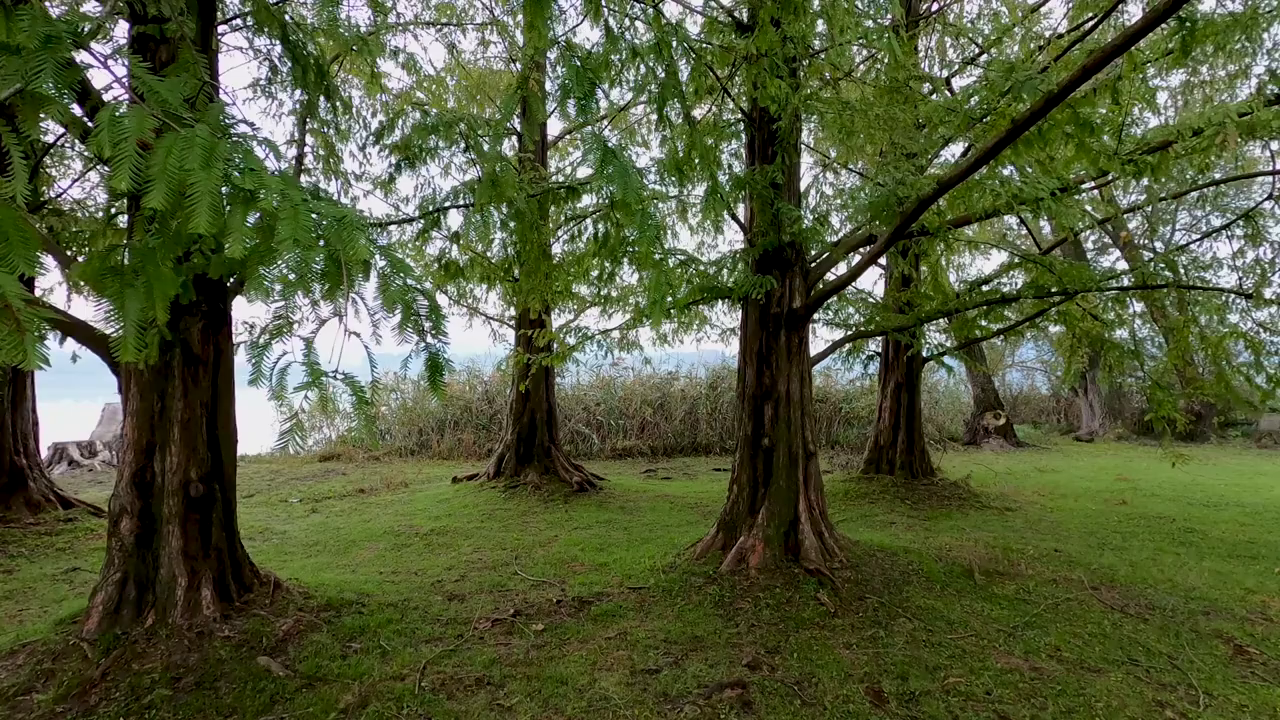

1/1 [==============================] - 0s 87ms/step
no danger


In [22]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Dataset/forest1.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2_imshow(frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("forest.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==1:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [23]:
from twilio.rest import Client
from playsound import playsound
if pred==1:
  print('Forest fire')
  account_sid='ACc0b32842aa3060ee6f4b2bfa1116247f'
  auth_token='c6a97bddc96eaf4803622bd76e8a96ff'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+14793974371',
      #to number
      to='+919025496556')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
else:
    print("No danger")

No danger
